# Задача N тел

Иоганн Кеплер (1571–1630). Несмотря на отсутсвие знаний о теории поля и динамике, о заметаемых движущейся вокруг центроида материальной точкой секторах (*второй закон Кеплера*).

При этом, по некоторым неподтверждённым данным, полагал, что сила тяжести от расстояния зависит как $\frac{1}{R}$, а не $\frac{1}{R^2}$.

## В нашей вселенной

У нас три пространственных измерения, одно временное и ещё с десяток (а то и больше) всяких мудрёных, которые участвуют в нашей жизни слишком неочевидным образом, чтобы относиться к данному курсу.

Материальная точка $a$ (вот об этом Кеплер не знал) индуцирует графитационное поле, которое является *потенциальным скалярным полем*. *Градиент* этого поля, умноженный на массу материальной точки $b$ индуцирует приложенную к ней силу тяжести. Сила тяжести направлена в сторону точки $a$, а её абсолютная величина пропорциональна *плотности потока* индуцированного точкой $a$ поля. Поток через любую поверхность вокруг токи $а$ постоянный. А плотность, если поверхность сферическая, обратно пропорциональна площади этой поверхности, т.е. пропорциональна $\frac{1}{R^2}$.

Смоделируем траекторию материальной точки около другой, «неподвижной» материальной точки. Находиться они будут всегда в одной плоскости, движение также будет в этой плоскости, поэтому модель вполне подойдёт двумерная, хотя мир и трёхмерный. Для двумерной модели можно бы было воспользоваться комплексными числами, но правильнее всё-таки векторами.

А также попробуем подтвердить или опровергнуть второй закон Кеплера численно.

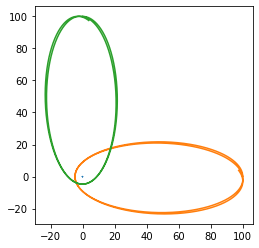

In [49]:
%matplotlib inline

from abc import ABC, abstractmethod
import numpy as np
from numpy import array as vec
import numpy.linalg
import matplotlib.pyplot as plt
import itertools

MODEL_G = 50.0  # гравитационная постоянная
COLLISION_DISTANCE = 3.0
MODEL_DELTA_T = 0.005
TIME_TO_MODEL = 10

# ABC это не алфавит, а AbstractBaseClass. Не даст создать экземпляр, пока не переопределишь все методы-заглушки
class Universe(ABC):
    """Невнятная вселенная, основа всех миров"""

    def __init__(self):
        self.bodies = []

    @abstractmethod
    def gravity_flow_dencity_per_1_1(self, dist):
        """
        Плотность потока гравитационного поля между двумя
        единичными массами на заданном расстоянии
        """
        ...

    def model_step(self):
        """Итерация решения задачи Коши. Конечно не присуща вселенной, но тут на своём месте"""
        for b1, b2 in itertools.product(self.bodies, self.bodies):
            if b1 != b2:
                b1.apply_force(b1.force_induced_by_other(b2))
        for b in self.bodies:
            b.advance()

    def add_body(self, body):
        self.bodies.append(body)


class MaterialPoint:
    """Материальная точка, движущаяся по двумерной плоскости"""
    
    def __init__(self, universe, mass, position, velocity):
        self.universe = universe
        self.mass = mass
        self.position = position
        self.velocity = velocity
        universe.add_body(self)

        self.ptrace = [self.position.copy()]
        self.vtrace = [self.velocity.copy()]
    
    def force_induced_by_other(self, other):
        """Сила, с которой другое тело действует на данное"""
        # Body is forward reference here
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  # Евклидова норма (по теореме Пифагора)
        force_direction = delta_p / distance
        force = force_direction * self.mass * other.mass *\
                self.universe.gravity_flow_dencity_per_1_1(distance)
        return force

    def advance(self):
        """Перемещаем тело, исходя из его скорости"""
        self.position += self.velocity * MODEL_DELTA_T
        self.ptrace.append(self.position.copy())
        self.vtrace.append(self.velocity.copy())

    def apply_force(self, force):
        """Изменяем скорость, исходя из силы, действующей на тело"""
        self.velocity += force * MODEL_DELTA_T / self.mass


class Universe3D(Universe):
    def __init__(self,
                 G,                  # гравитационная постоянная
                 collision_distance  # всё-таки это не точки
                 ):
        super().__init__()
        self.G = G
        self.collision_distance = collision_distance

    def gravity_flow_dencity_per_1_1(self, dist):
        # будем считать, что отскакивают точки друг от друга резко,
        # но стараться не допускать этого
        return self.G / (
            dist ** 2 if dist > self.collision_distance
            else -self.G / dist ** 3
        )


u = Universe3D(MODEL_G, COLLISION_DISTANCE)

bodies = [
    MaterialPoint(u,  5000. , vec([  0.,   0.]), vec([ 0.,   0.])),
    MaterialPoint(u,      .1, vec([100.,   0.]), vec([ 0.,  15.])),
    MaterialPoint(u,      .1, vec([  0., 100.]), vec([15.,   0.]))
]
    
steps = int(TIME_TO_MODEL / MODEL_DELTA_T)
for stepn in range(steps):
    u.model_step()


plt.gca().set_aspect('equal')

for b in bodies:
    # Вот так понятно
    # t = b.ptrace
    # xs = [p[0] for p in t]
    # ys = [p[1] for p in t]
    # plt.plot(xs, ys)
    # А так — лихо. Кто объяснит? =)
    plt.plot(*tuple(map(list, zip(*b.ptrace))))

plt.show();


Мы получили идеальную картину близкую к реальной: малые материальные точки друг на друга влияют слабо (потому как лёгкие), большая — почти центроид, пространство трёхмерное.

## В планиверсуме

А.К. Дьюдни. Планиверсум. Виртуальный контакт с двумерным миром (оригинал англ., 1984 г.)

Вполне возможно, что сам Дьюдни, как и Кеплер (но по иным причинам) не думал о применении аппарата теории поля к описываемому им миру. А ведь в его мире материальную точку должна окружать не сфера, а окружность. И (вспоминаем Кеплера!), если теорию поля брать за основу, сила тяжести в двумерном мире действительно будет пропорциональна $\frac{1}{R}$!

### Задание

#### a

Взять код выше и смоделировать ситуацию для двумерного мира (в котором сила тяготения пропорциональна $\frac{1}{R}$) — сделать `Universe2D` по аналогии с `Universe3D`.

#### b

Пользуясь тем, что площадь заметаемого сектора — $|d\vec{S}| \approx |\vec{r} \times d\vec{r}| = |\vec{r} \times \vec{v} dt|$, проверить, выполнится ли второй закон Кеплера для трёхмерной вселенной

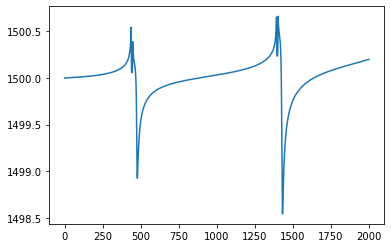

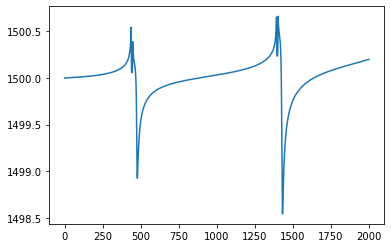

In [53]:
for b in bodies[1:]:
    ...  # посмотрите, выполняется ли второй закон Кеплера

Кажется, что не выполняется? А вы посмотрите повнимательнее!